# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Свойства оценок

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as sps
import seaborn as sns[[]]
sns.set(font_scale=1.5)

###   1. Несмещенность оценок

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$. 
Как известно из теории, оценки $\frac{n+1}{n}X_{(n)}, 2\overline{X}$ являются *несмещенными*. В то время как, оценка  $X_{(n)}$ таким ствойством не обладает. Давайте визуализируем данные свойства оценок.

Реализуем выборку из равномерного распределения размером `sample_size`=100.

In [2]:
sample_size = 100
X = sps.uniform.rvs(size=sample_size)

В этом случае мы сгенерировали выборку из распределения $U[0, 1]$.


Реализуйте три функции, каждая из которых на вход берет несколько выборок, а на выход выдает массив оценок  
(первая функция - $X_{(n)}$, вторая функция - $\frac{n+1}{n}X_{(n)}$, третья функция - $2\overline{X}$)  для каждой выборки.

In [9]:
def estimate_X_n(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    return np.max(X, axis=1)

def estimate_X_n_corrected(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    n_samples, sample_size = X.shape
    max_values = np.max(X, axis=1)
    return (sample_size + 1) / sample_size * max_values

def estimate_2_mean(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    return 2 * np.mean(X, axis=1)

Проверим, что ваши функции реализованы корректно (ячейка не должна выдавать ошибок).

In [10]:
X = np.array([[1, 3, 3902, 6], [2, 5, 69751, 89]])


assert(sum(estimate_X_n(X) != np.array(( 3902, 69751))) == 0)
assert(sum(estimate_X_n_corrected(X) != np.array((4877.5 ,87188.75))) == 0)
assert(sum(estimate_2_mean(X) != np.array([ 1956. , 34923.5])) == 0)


Зададим список оценок и разные параметры для отрисовки графика

In [11]:
estimators = [
    (estimate_X_n, r'$X_{(n)}$', 'blue', 0.0),
    (estimate_X_n_corrected, r'$\frac{n+1}{n}X_{(n)}$', 'purple', 0.1),
    (estimate_2_mean, r'$2\overline{X}$', 'green', 0.2)
]

Мы хотим понять, являются ли оценки параметра $\theta$ смещенными, для этого нам нужно провести множество экспериментов (сгенерировать выборку много раз, так как при каждой генерации получаются разные числа).

 Создадим 500 выборок размера `sample_size`.

In [19]:
sample_count = 500
sample_size = 100
X = np.random.rand(sample_count, sample_size)
X.shape

(500, 100)

Визуализируем полученные оценки на одном графике. Звездочками обозначим средние значения по 500 экспериментам для каждой оценки.

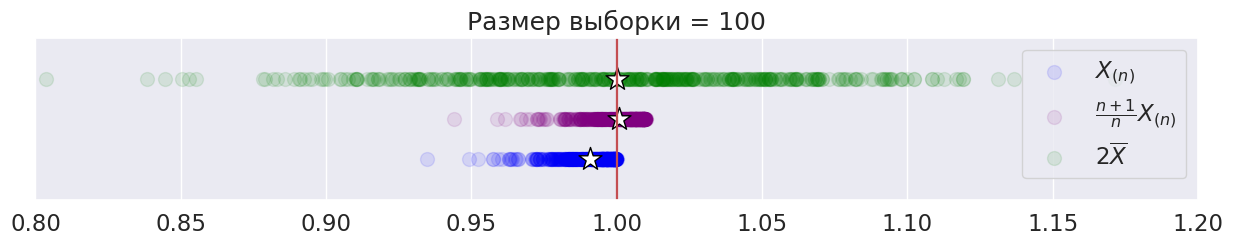

In [14]:
plt.figure(figsize=(15, 0.7*len(estimators)))
for estimator, name, color, y in estimators:
    E = estimator(X)
    plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
    plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((0.8, 1.2))
    plt.ylim((-0.1, 0.1 * len(estimators)))

Напишите функцию построения таких графиков в общем виде: на вход функция может получать любые распределения (`distributions`) и любые оценки (`estimators`).

In [30]:
def est_plot(distribution, estimators, sample_size, sample_count):
    '''
    Построение графика разброса реализаций оценок и их средних значений.

    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''
    plt.figure(figsize=(15, 0.7*len(estimators)))
    
    X = distribution.rvs(size=(sample_count, sample_size))
    
    for estimator, name, color, y in estimators:
        E = estimator(X)
        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                        s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                        color='w', edgecolors='black')

        plt.vlines(1, -1, 1, color='r')
        plt.title('Размер выборки = %d' % sample_size)
        plt.yticks([])
        plt.legend()
        plt.xlim((-2.5, 5))
        plt.ylim((-0.1, 0.1 * len(estimators)))

Постройте три графика, аналогичных верхнему, для разных размеров выборок (10, 100, 500).


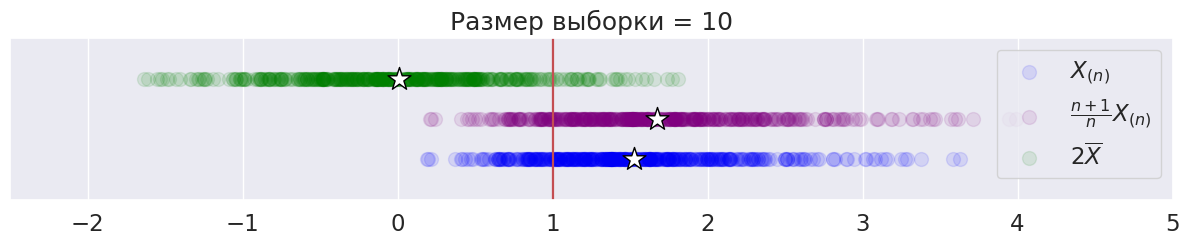

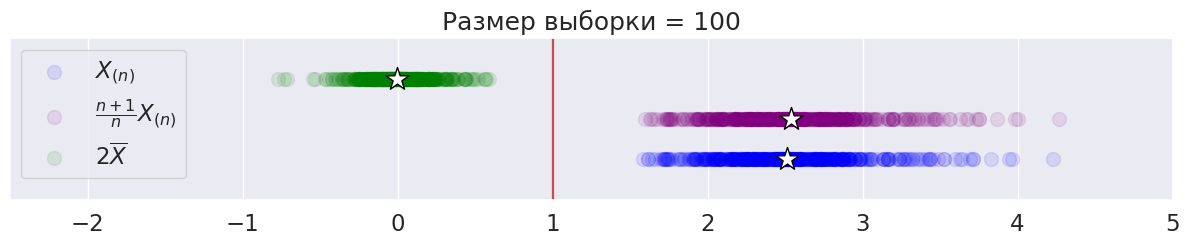

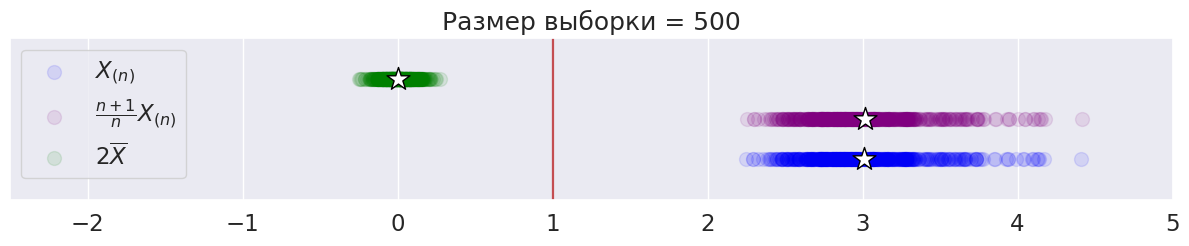

In [31]:
sample_count = 500  # количество экспериментов
sample_size_list = [10, 100, 500] # размеры выборок

normal_distribution = sps.norm(loc=0, scale=1)
for sample_size in sample_size_list:
    est_plot(normal_distribution, estimators, sample_size, sample_count)

**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

In [42]:
def mean_plot(distribution, estimators, n_grid, sample_count):
    '''
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    n_grid -- массив значений размера выборки
    sample_count -- количество генерируемых выборок
    '''
    plt.figure(figsize=(12, 8))

    for estimator, name, color, y in estimators:
        mean_values = []
        for n in n_grid:
            X = distribution.rvs(size=(sample_count, int(n)))
            E = estimator(X)
            mean_values.append(E.mean())

        plt.plot(n_grid, mean_values, label=name, color=color)

        plt.axhline(y=1, color='r', linestyle='--', label='True parameter')
        plt.xlabel('Sample Size (n)')
        plt.ylabel('Mean of Estimators')
        plt.title('Behavior of Estimator Means with Increasing Sample Size')
        plt.legend()
        plt.grid(True)
        plt.show()

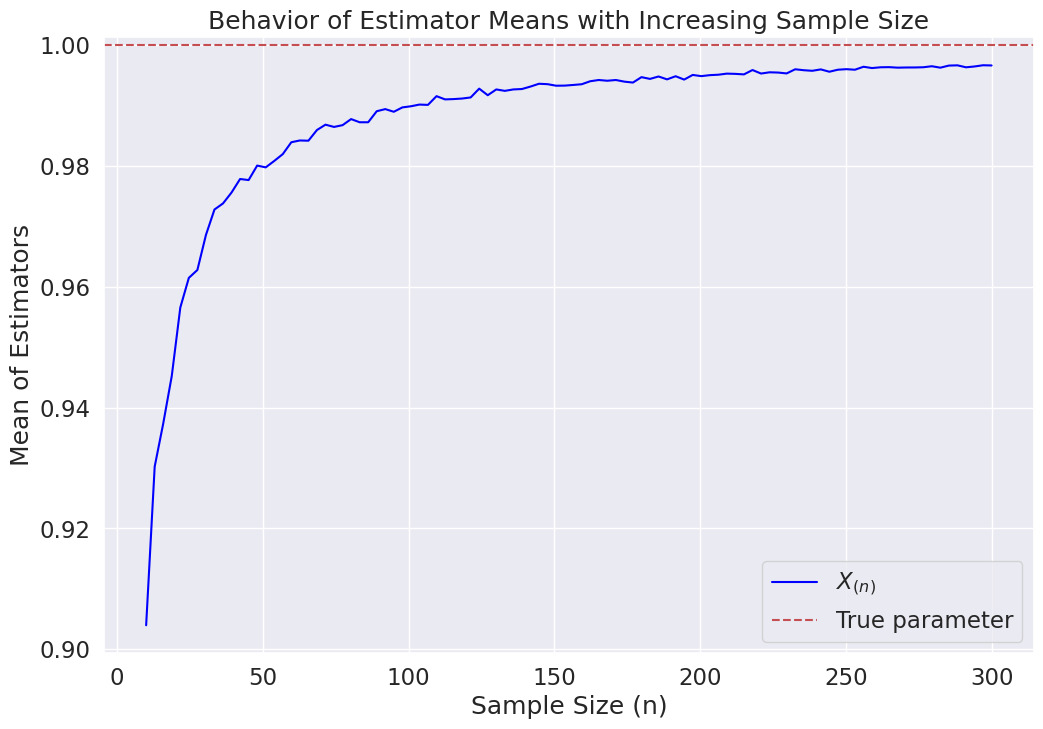

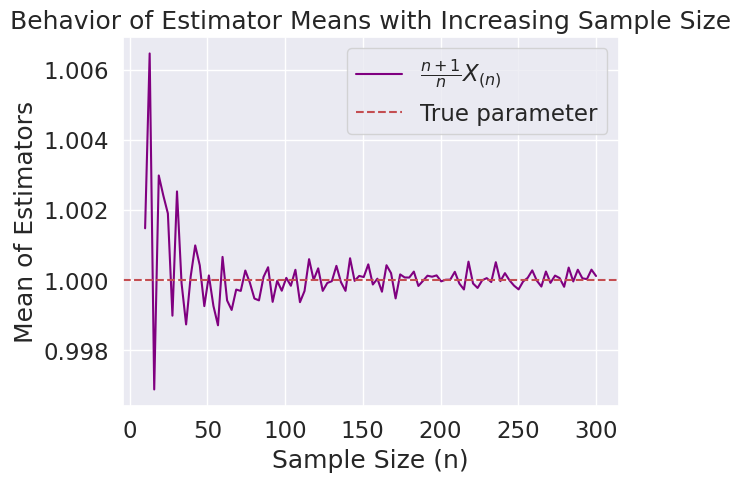

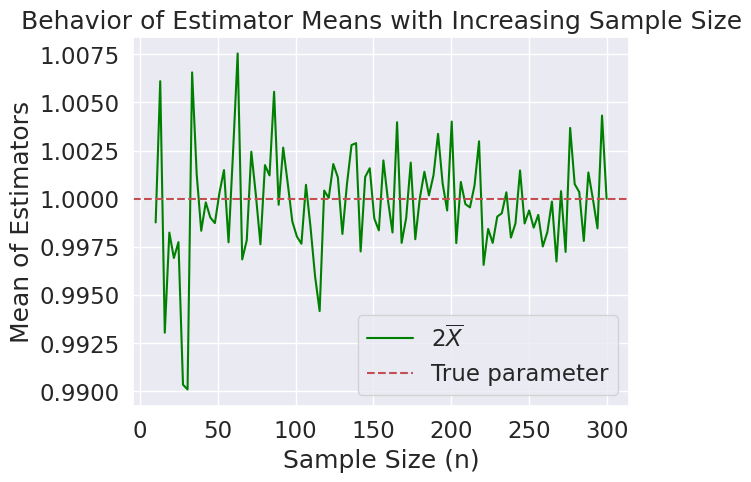

In [43]:
n_grid = np.linspace(10, 300, 100)
mean_plot(sps.uniform, estimators, n_grid, sample_count)

**Вывод.** Несмещенность &mdash; свойство оценки в среднем быть равной параметру, который она оценивает. Иначе говоря, при бесконечном повторении эксперимента в среднем оценка будет равна истинному значению параметра.
Проведенные эксперименты подтверждают свойство несмещенности &mdash; среднее значение несмещенных оценок $\frac{n}{n-1}X_{(n)}$ и $2\overline{X}$ оказались примерно равны истинному значению параметра в отличии от смещенной оценки $X_{(n)}$. Кроме того, можно заметить, что для смещенной оценки $X_{(n)}$ смещение уменьшается с ростом размера выборки, иначе говоря, она является *асимптотически несмещенной*.

В лабораторных работах скорректированные оценки используют, т.к. число опытов часто мало и $n$ нельзя считать достаточно большим. В таком случае отличие между несмещенными оценками и асимптотически несмещенными оценками становится существенным.

### 2. Состоятельность оценок

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $Exp(\theta)$. Как известно из теории, оценка $\widehat{\theta} = 1/\overline{X}$ является *состоятельной* и *асимтотически нормальной* оценкой параметра $\theta$ с асимптотической дисперсией $\theta^2$. В этой задаче вам необходимо визуализировать данные свойства.


Зададим параметры эксперимента


In [74]:
theta = 2  # истинное значение параметра
sample_size = 300  # размер выборок
sample_count = 500  # количество выборок
n_range = (np.arange(sample_size) + 1)  # размеры подвыборок


Сгенерируем множество выборок из распределения $Exp(\theta)$ (количество выборок - `sample_count`, размер каждой выборки - `sample_size`)

In [87]:
# генерируем множество выборок,
# параметр theta является обратным к параметру масштаба
samples = np.random.exponential(scale=1/theta, size=(sample_count, sample_size))


Вычислим оценки в зависимости от размера выборки, усредняем по последней оси

In [88]:
estimation = n_range / samples.cumsum(axis=1)
estimation

array([[14.97097353,  6.50761193,  6.55422792, ...,  2.10974724,
         2.11327478,  2.11603018],
       [ 2.40738019,  3.50517912,  4.83849576, ...,  1.78918154,
         1.78227798,  1.78268525],
       [ 6.24849963,  3.26056568,  2.58281928, ...,  1.87328623,
         1.86527031,  1.86789475],
       ...,
       [ 1.51317196,  1.73875394,  1.38835829, ...,  2.01343301,
         2.0104979 ,  2.01115525],
       [ 3.81426863,  3.16683224,  2.51808828, ...,  2.10789229,
         2.10492769,  2.11039818],
       [ 3.57006663,  4.6692425 ,  5.04302821, ...,  1.84352606,
         1.84855779,  1.84323386]])

Визуализируем для каждой выборки все оценки в зависимости от размера выборки.

Что можно сказать о состоятельности данной оценки?

In [89]:
def est_plot(estimation, sample_count, sample_size, left=None, right=None, xlim = sample_size ):
    '''
    estimation -- массив оценок от размера выборки
    sample_count -- количество генерируемых выборок
    sample_size -- размер каждой выборки
    left, rigth -- границы доверительного интеравала, нужны будут далее
    xlim = область по x
    '''
    
    plt.figure(figsize=(15, 7))
    for i in range(sample_count):
        plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)
    if type(left) and type(right) is np.ndarray:
        
        plt.plot(np.arange(sample_size) + 1, left, color='black')
        plt.plot(np.arange(sample_size) + 1, right, color='black')
        labels = [r'$\hat{\theta}$', r'$\theta$',
                  'Границы доверительного интервала']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),
                   Line2D([0], [0], color='black', lw=2)]
        
    else: 
        labels = [r'$\hat{\theta}$', r'$\theta$']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),]
    
    plt.hlines(theta, 0 ,sample_size, color='red')
    plt.title('Поведение оценки для разных реализаций')
    plt.xlabel('Размер выборки')
    plt.ylim((0, 5))
    plt.legend(handels, labels)
    plt.xlim((0, xlim))

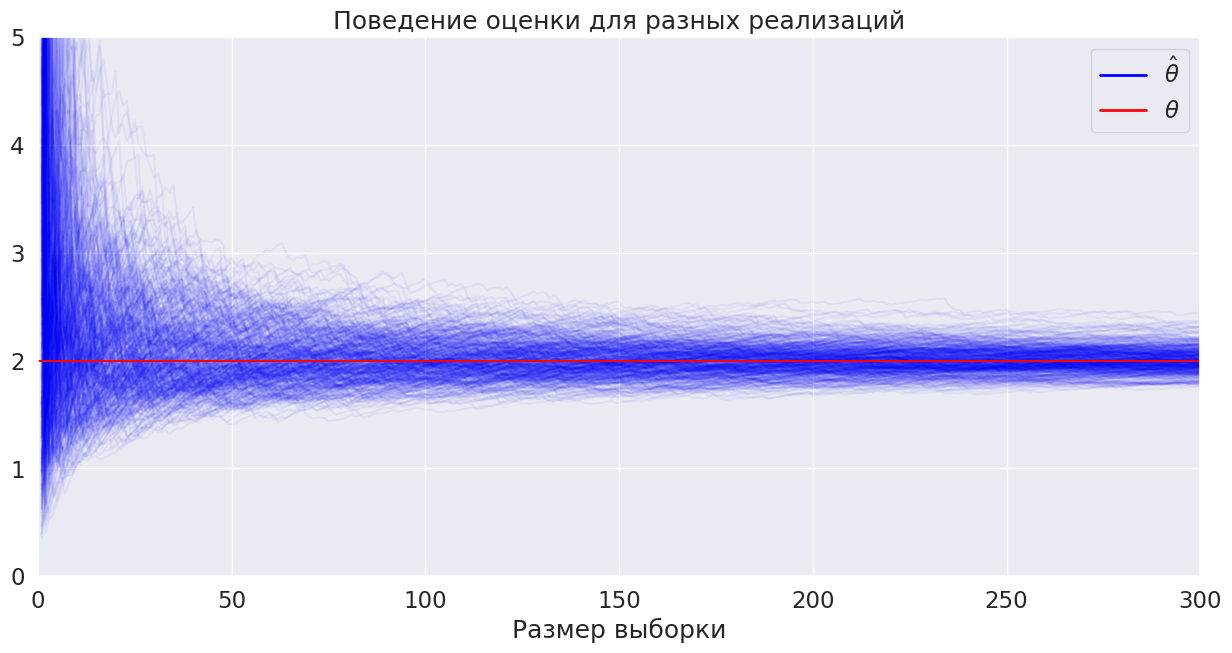

In [90]:
est_plot(estimation, sample_count, sample_size)

**Ответ:** Полученная оценка, исходя из графика, является состоятельной и асимптотически нормальной.

### 3. Асимптотическая нормальность оценки

Добавим доверительный интервал для нашей оценки.

Свойство *асимптотической нормальности* говорит о том, что с вероятностью около 0.95 при больших размерах выборки значение оценки отклоняется от истинного значения параметра не более чем на $2\theta\left/\sqrt{n}\right.$. Добавте интервалы в функцию, чтобы на рисунок добавился доверительный интервал.

In [102]:
right = theta + 2*theta/(n_range**0.5)
left = theta - 2*theta/(n_range**0.5)

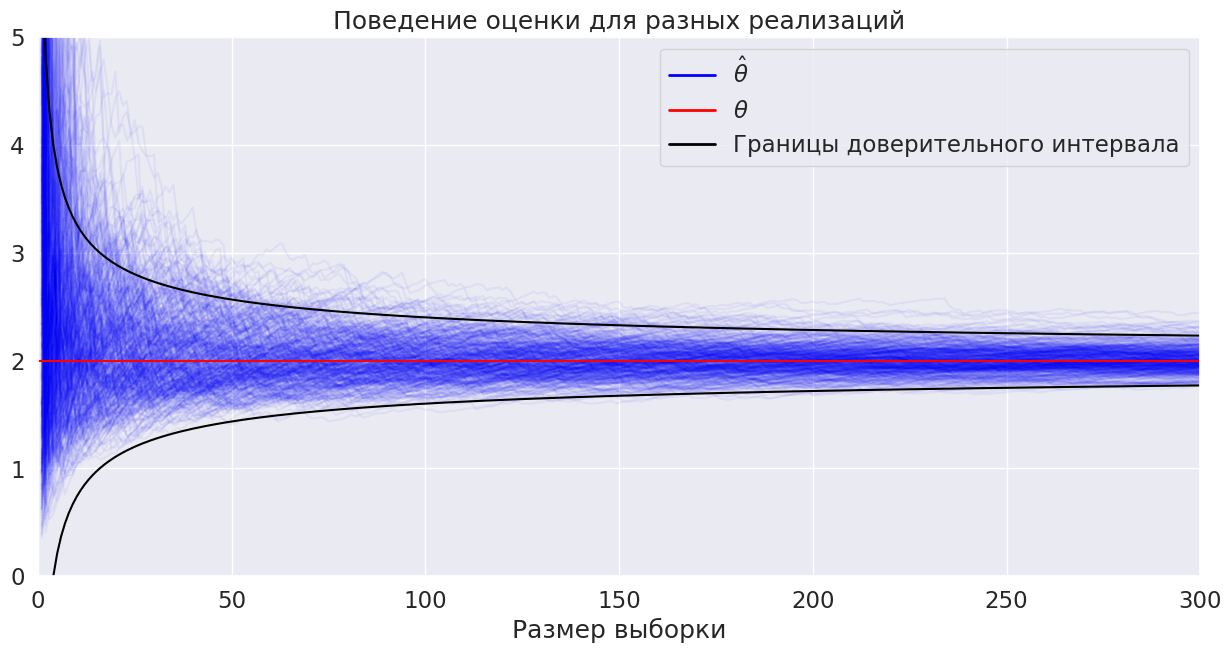

In [101]:
est_plot(estimation, sample_count, sample_size, left, right)

**Вывод:** мы видим, что наша оценка преимущественно лежит в доверительном интервале

Приблизим этот график в области малых размеров выборки (до 50). Какой вывод вы можете сделать?

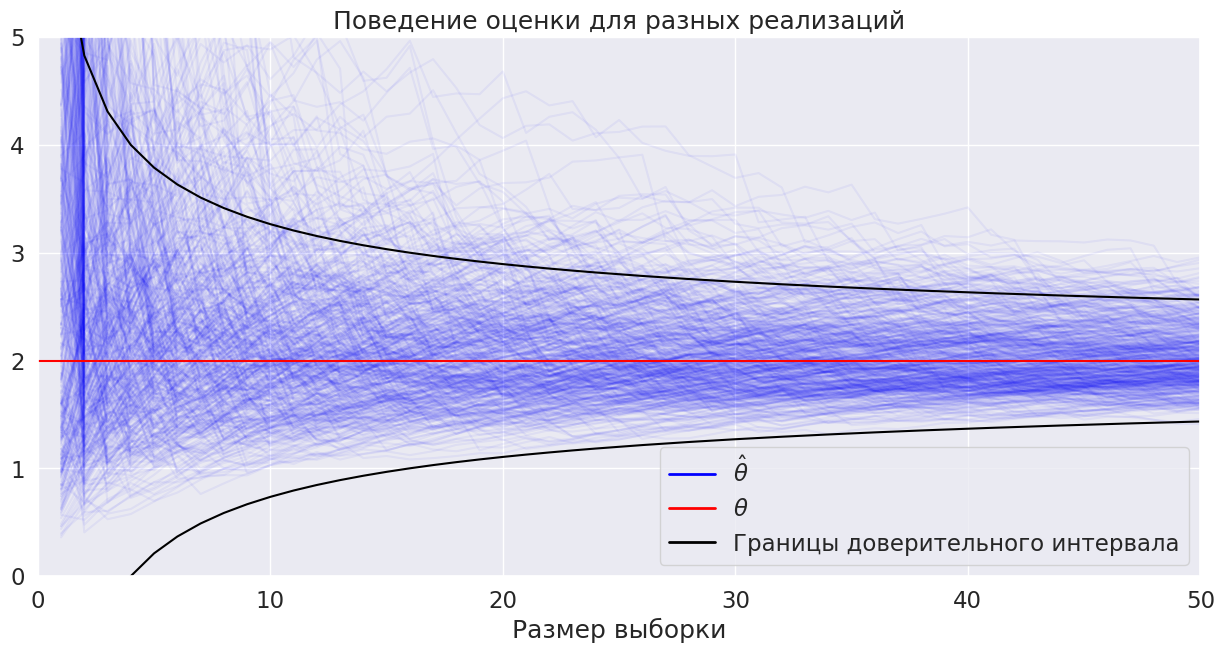

In [104]:
est_plot(estimation, sample_count, sample_size, left, right, xlim = 50)

**Вывод:** размеры выборки малые, поэтому оценка стала больше выпадать. Это не противоречит теории так как она говорит про большие размеры выборок (n >> 1).